# **Problem Statement**
**Overview**

Diabetes is a chronic condition that has significant health impacts worldwide. Early detection
and management are crucial in reducing its complications. The goal of this project is to
develop a machine-learning model that can predict whether an individual is likely to have
diabetes based on various health parameters.

# **Objective**
The primary objective of this project is to leverage machine-learning techniques to classify
individuals as diabetic or non-diabetic based on key features such as age, BMI, cholesterol
levels, physical activity, and general health.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/diabetes_data.csv')
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


# **basic understand of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


In [ ]:
df.duplicated().sum()

6672

In [ ]:
df.shape

(70692, 18)

# **visulaization**

<Axes: xlabel='Diabetes', ylabel='Count'>

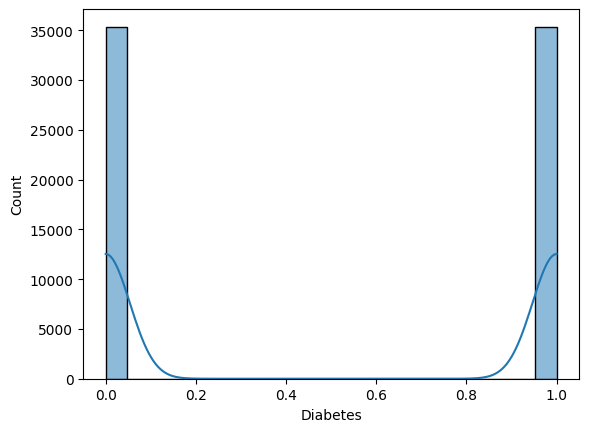

In [ ]:
sns.histplot(df['Diabetes'],kde=True)

In [ ]:
df.hist(figsize=(12,15))

NameError: name 'df' is not defined

# **Feature Engineering**

## **correlation**

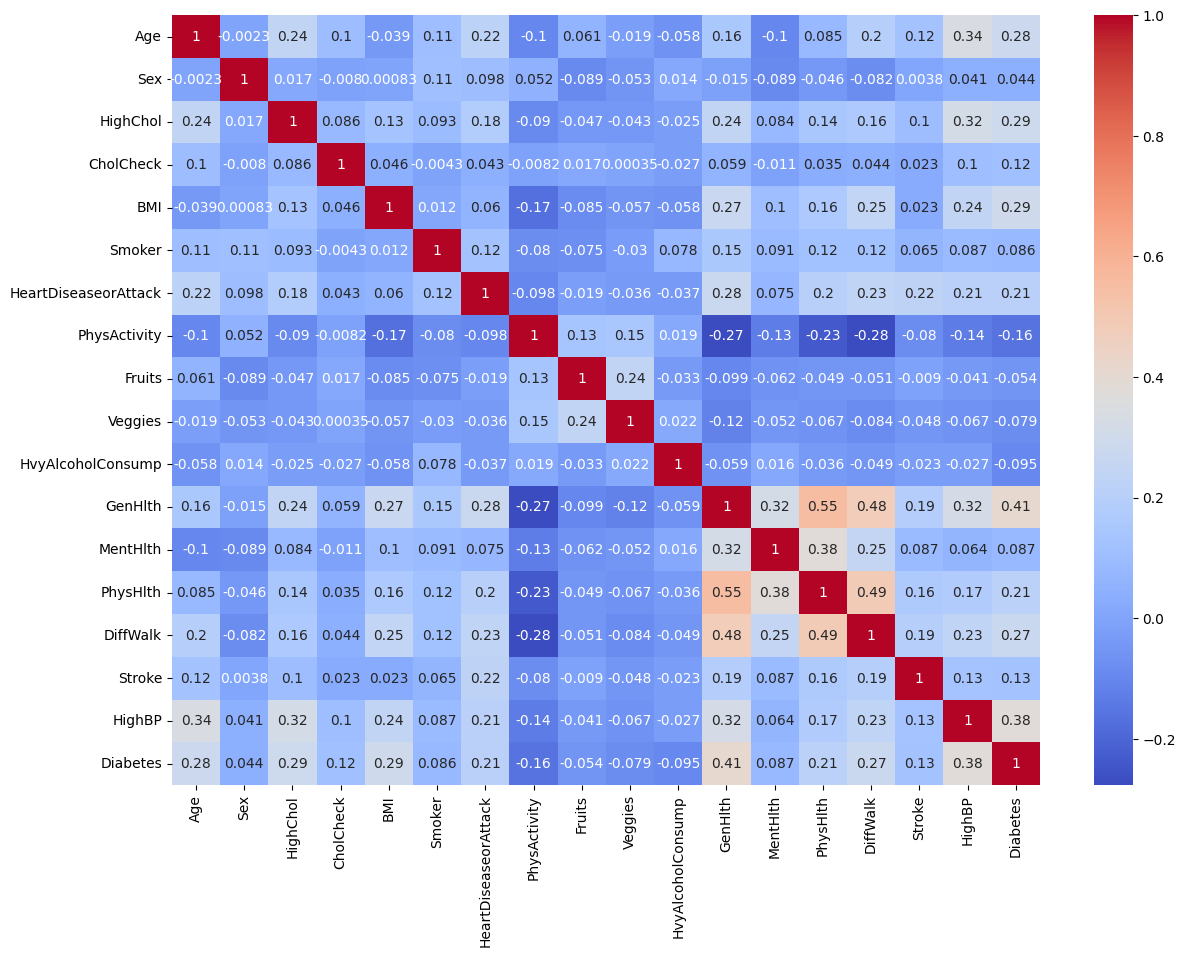

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
cor=df.corr()['Diabetes']
cor

,Diabetes
Age,0.278738
Sex,0.044413
HighChol,0.289213
CholCheck,0.115382
BMI,0.293373
Smoker,0.085999
HeartDiseaseorAttack,0.211523
PhysActivity,-0.158666
Fruits,-0.054077
Veggies,-0.079293


Removed irrelevant features such as "Stroke," "MentHlth," "Sex," "Veggies," and
"Fruits".

In [ ]:
df.drop(['Stroke'],axis=1,inplace=True)
df.drop(['MentHlth'],axis=1,inplace=True)
df.drop(['HvyAlcoholConsump'],axis=1,inplace=True)
df.drop(['Veggies'],axis=1,inplace=True)
df.drop(['Fruits'],axis=1,inplace=True)
df.drop(['PhysActivity'],axis=1,inplace=True)
df.drop(['HeartDiseaseorAttack'],axis=1,inplace=True)
df.drop(['Smoker'],axis=1,inplace=True)
df.drop(['BMI'],axis=1,inplace=True)
df.drop(['CholCheck'],axis=1,inplace=True)
df.drop(['HighChol'],axis=1,inplace=True)
df.drop(['Sex'],axis=1,inplace=True)

df


,Age,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,3.0,30.0,0.0,1.0,0.0
1,12.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,10.0,0.0,0.0,0.0
3,11.0,3.0,3.0,0.0,1.0,0.0
4,8.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
70687,6.0,4.0,0.0,0.0,0.0,1.0
70688,10.0,2.0,0.0,1.0,0.0,1.0
70689,13.0,5.0,0.0,1.0,1.0,1.0
70690,11.0,4.0,0.0,1.0,1.0,1.0


## **Outlier Detection:**
Used box plots to detect and visualize outliers.

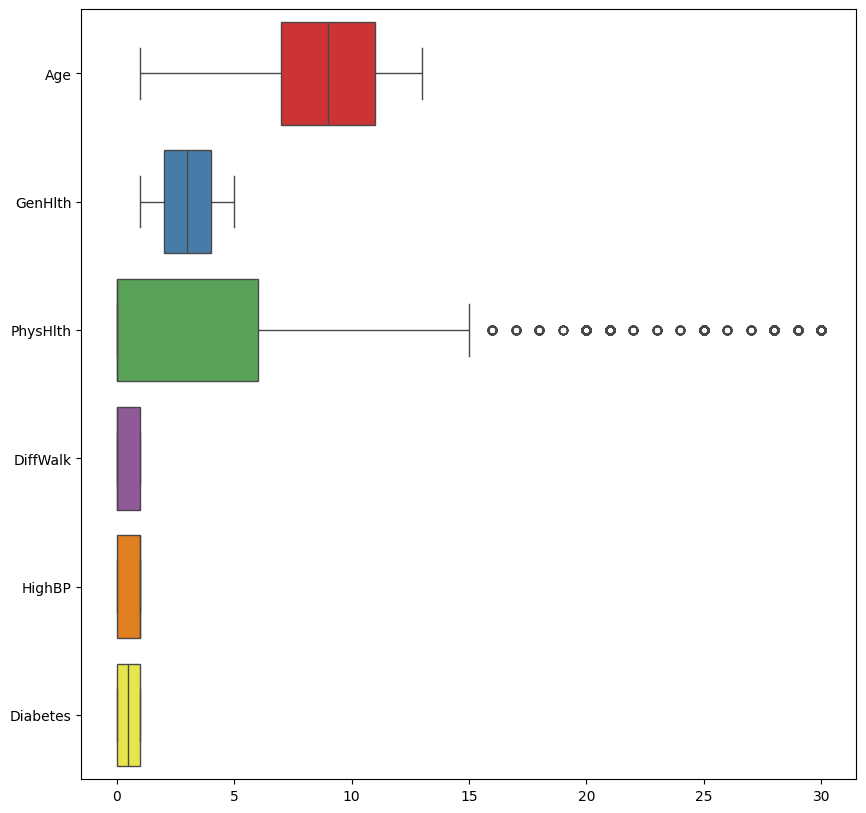

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df,orient='h',palette='Set1')
plt.show()

In [ ]:
Q1=np.quantile(df,0.25)
Q2=np.quantile(df,0.50)
Q3=np.quantile(df,0.75)
Q1,Q2,Q3
IQR=Q3-Q1
IQR

4.0

In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


df_no_outliers = remove_outliers_iqr(df,'PhysHlth')

## **skewness handling**

Addressed skewness in data using logarithmic transformation.

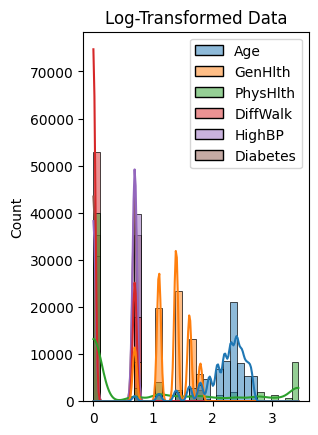

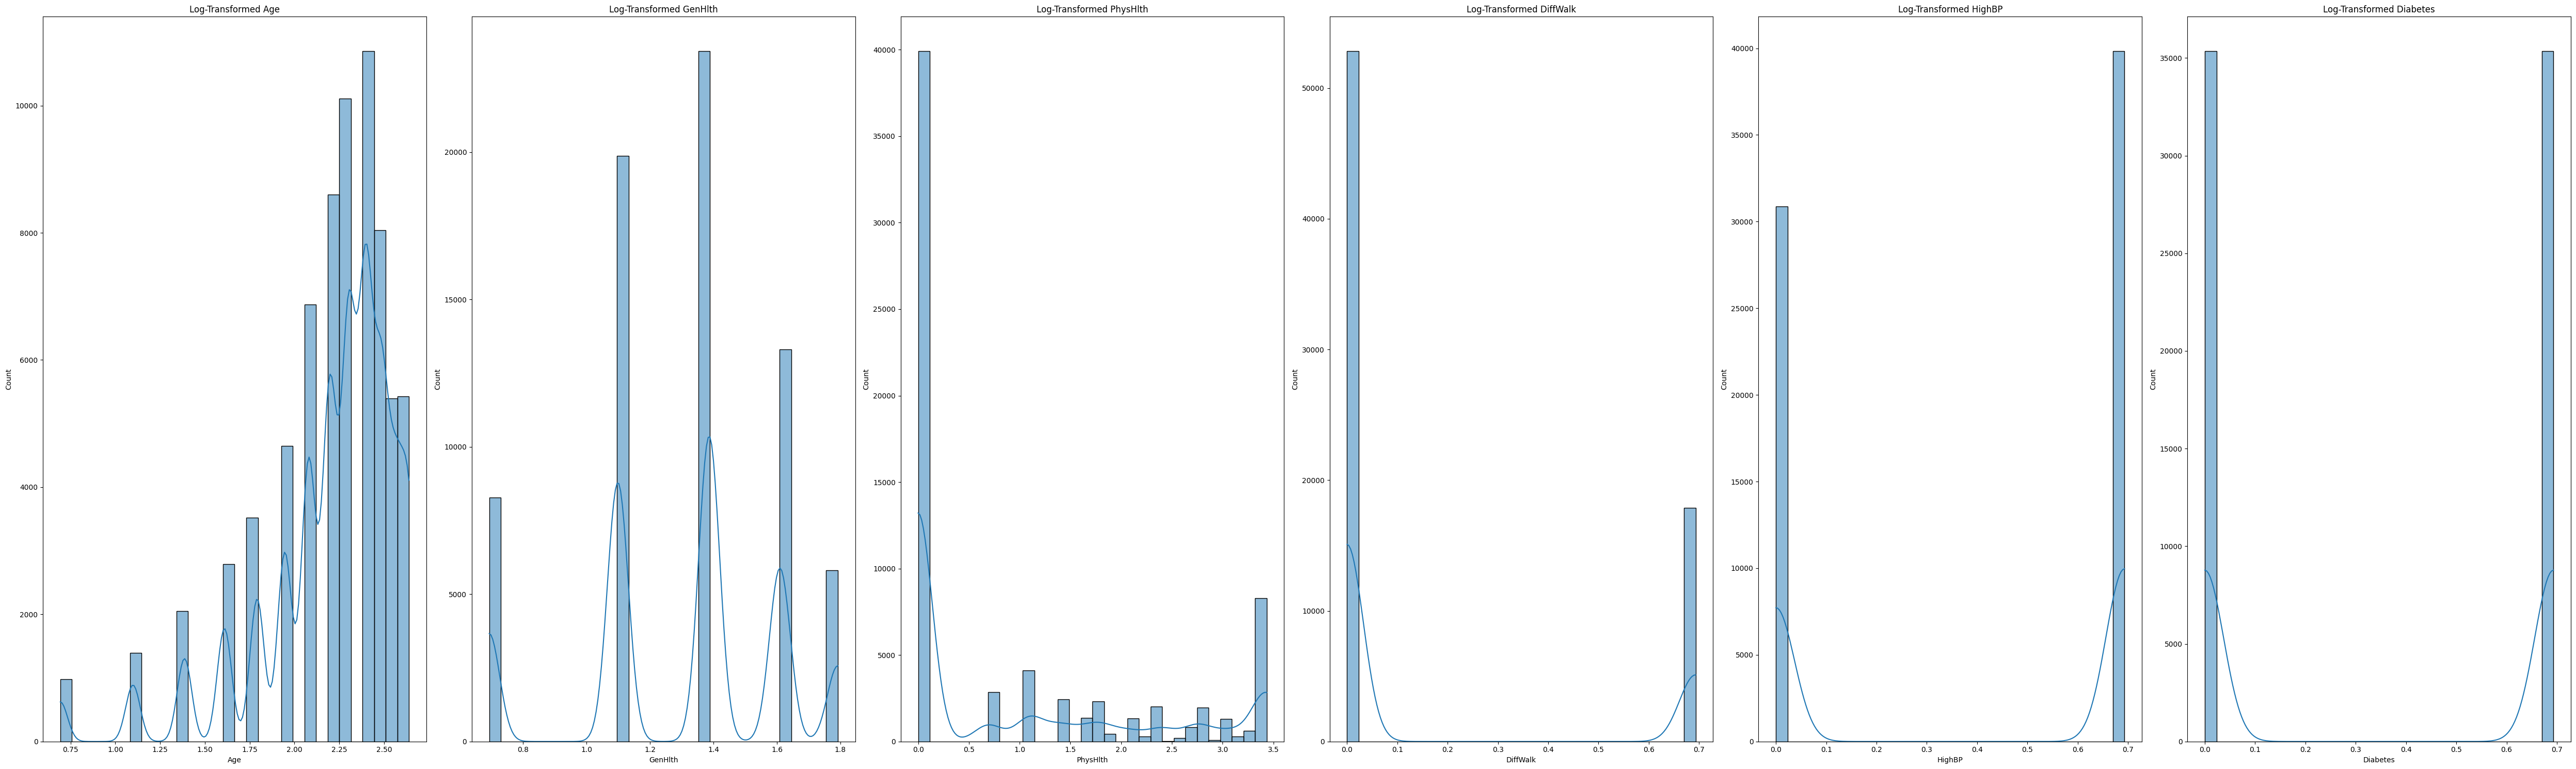

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(70692, 6)

# **training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.columns

Index(['Age', 'GenHlth', 'PhysHlth', 'DiffWalk', 'HighBP', 'Diabetes'], dtype='object')

In [ ]:

from sklearn.ensemble import  GradientBoostingClassifier


In [ ]:
independet_feature = ["Age","GenHlth","PhysHlth","DiffWalk","HighBP"]
dependet_feature = ['Diabetes']
x = df[independet_feature]
y = df[dependet_feature]

Scaled the features using StandardScaler for normalization.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import xgboost

Split the data into training (80%) and testing (20%) sets.

In [ ]:
# Assuming you have your features in 'X' and target variable in 'y'

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a GradientBoostingClassifiert Classifier object
model_1 = GradientBoostingClassifier()  # You can adjust hyperparameters

# Train the model
model_1.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_1.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7240257443949359


array([[4609, 2481],
       [1421, 5628]])

In [ ]:
!pip install xgboost

In [ ]:

import xgboost as xgb

# Create an XGBoost Classifier object
model_2 = xgb.XGBClassifier()  # You can adjust hyperparameters

# Train the model
model_2.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_2.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.7220454063229366


array([[4635, 2455],
       [1475, 5574]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an RandomForestClassifier Classifier object
model_3 = RandomForestClassifier()  # You can adjust hyperparameters

# Train the model
model_3.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_3.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7165287502652239


array([[4695, 2395],
       [1613, 5436]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create an LogisticRegression Classifier object
model_4 =LogisticRegression()  # You can adjust hyperparameters

# Train the model
model_4.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_4.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7221161326826508


array([[4882, 2208],
       [1721, 5328]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create an KNeighborsClassifier Classifier object
model_5 =KNeighborsClassifier()  # You can adjust hyperparameters

# Train the model
model_5.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_5.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.6766390833863781


array([[5027, 2063],
       [2509, 4540]])

In [ ]:
y_test

,Diabetes
44967,1.0
20220,0.0
23944,0.0
2707,0.0
42356,1.0
...,...
59313,1.0
44805,1.0
30661,0.0
30295,0.0


In [ ]:
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

# summarizing the **algorithms**

The code employs five different machine learning algorithms for diabetes prediction: Gradient Boosting, XGBoost, Random Forest, Logistic Regression, and K-Nearest Neighbors. Gradient Boosting and XGBoost are ensemble methods that build strong predictive models by combining multiple decision trees. Random Forest also uses decision trees but creates them independently for increased robustness. Logistic Regression is a linear model suitable for binary classification, while K-Nearest Neighbors classifies data points based on the majority class among their nearest neighbors. These diverse algorithms provide a comprehensive approach to diabetes prediction, allowing for comparison and selection of the most effective model.

**Based on the provided code, here's a comparison of the accuracy scores for each algorithm:**

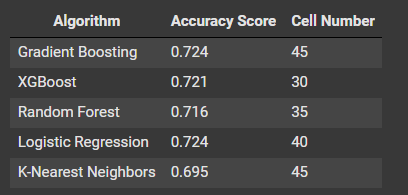